In [58]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import locale

locale.setlocale(locale.LC_ALL, 'de_DE.UTF-8')

'de_DE.UTF-8'

In [29]:
data = pd.read_csv('niedersachsen-subsidies.csv')
data2017 = data[data.year == 2017]

In [4]:
receivers = data[data.year == 2017].groupby(['recipient_name', 'scheme'])['amount'].agg('sum')

In [5]:
top_receivers = data[data.year == 2017].groupby('recipient_name')['amount'].agg('sum').sort_values(ascending=False)

# 10 Top receivers

In [28]:
HTML(pd.DataFrame(top_receivers[:10]).to_html())

,amount
recipient_name,
Erzeugergroßmarkt Langförden-Oldenburg eG,3104940.58
Elbe-Obst Erzeugerorganisation r.V.,3056772.63
Gartenbauzentrale Papenburg eG,2604792.31
NLWKN,2586804.46
Stiftung Naturschutzpark Lüneburger Heide,2333452.66
Pilzland Vertriebs GmbH,1832877.83
Raiffeisen Centralheide e.G.,1739697.36
Marktgemeinschaft Altes Land GmbH,1523518.45
ML-Verwaltungsbehörde/Ref. 305,1095268.02


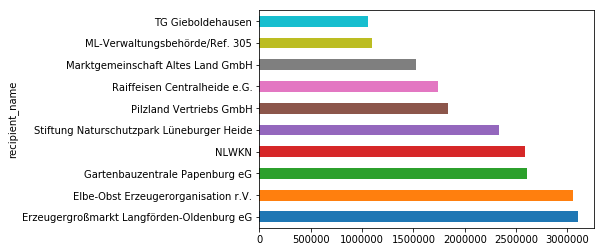

In [6]:
top_receivers[:10].plot.barh()

# Top receivers' type of subsidies

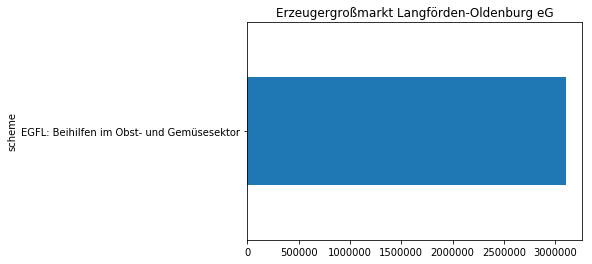

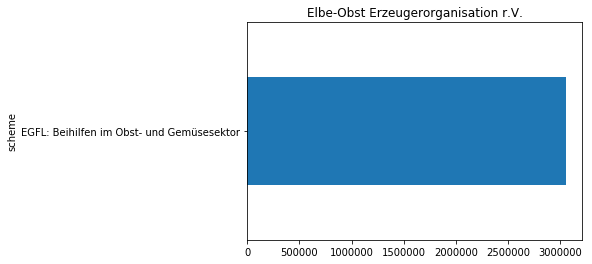

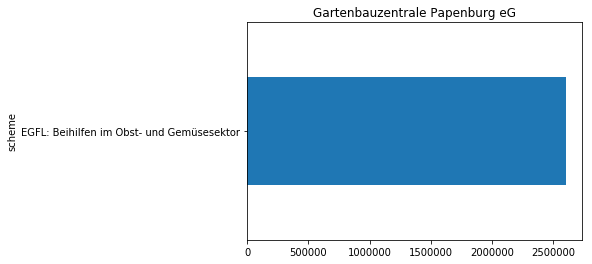

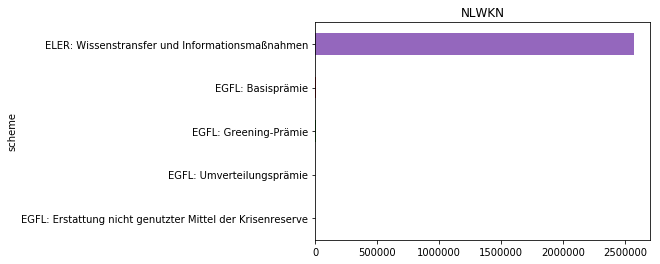

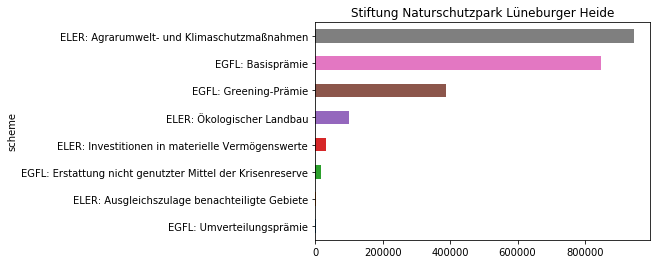

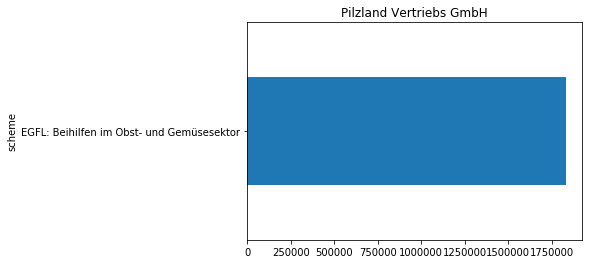

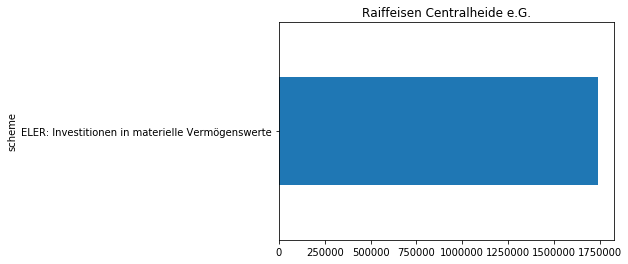

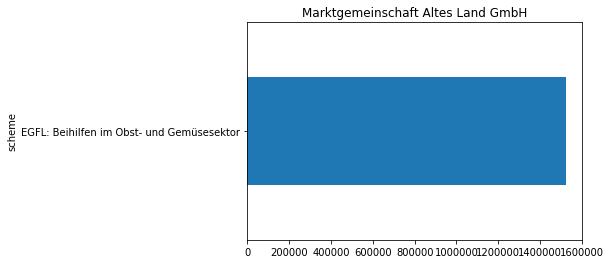

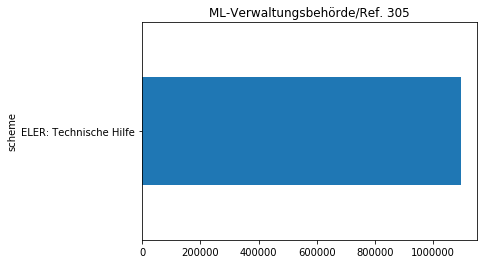

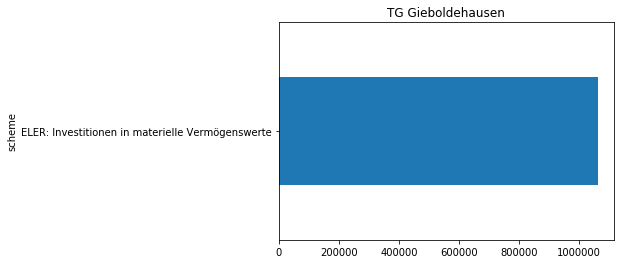

<Figure size 432x288 with 0 Axes>

In [24]:
for rcv_name, rcv_value in top_receivers[:10].items():
    receivers[rcv_name].sort_values(ascending=True).plot.barh(title=rcv_name)
    plt.figure()

# Number of recipients by subsidy type

In [35]:
HTML(pd.DataFrame(data2017['scheme'].value_counts()).to_html())

,scheme
EGFL: Basisprämie,40676
EGFL: Umverteilungsprämie,40671
EGFL: Greening-Prämie,40629
EGFL: Erstattung nicht genutzter Mittel der Krisenreserve,36847
ELER: Ausgleichszulage benachteiligte Gebiete,13286
ELER: Agrarumwelt- und Klimaschutzmaßnahmen,10341
EGFL: Maßnahmen zur Stützung der Agrarmärkte EU-HHJ 2017,4406
EGFL: Junglandwirteprämie,3363
ELER: Ökologischer Landbau,1137
EGFL: Kleinerzeugerregelung,644


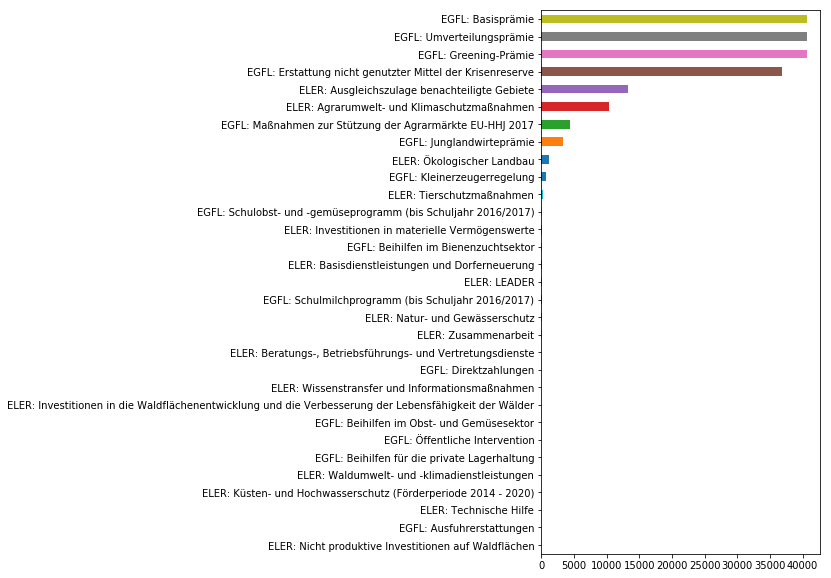

In [38]:
data2017['scheme'].value_counts().sort_values(ascending=True).plot.barh(figsize=(5,10))

# Total per subsidy type

In [57]:
HTML(pd.DataFrame(data2017.groupby('scheme')['amount'].agg('sum').sort_values(ascending=False).apply(lambda v: locale.currency(v))).to_html())

,amount
scheme,
EGFL: Basisprämie,"487665072,96 €"
EGFL: Greening-Prämie,"219539904,05 €"
EGFL: Umverteilungsprämie,"56310437,67 €"
ELER: Agrarumwelt- und Klimaschutzmaßnahmen,"42653583,11 €"
ELER: Investitionen in materielle Vermögenswerte,"20478655,42 €"
EGFL: Maßnahmen zur Stützung der Agrarmärkte EU-HHJ 2017,"20100113,57 €"
ELER: Ausgleichszulage benachteiligte Gebiete,"16648119,53 €"
ELER: Ökologischer Landbau,"15363427,76 €"
EGFL: Beihilfen im Obst- und Gemüsesektor,"13066497,14 €"


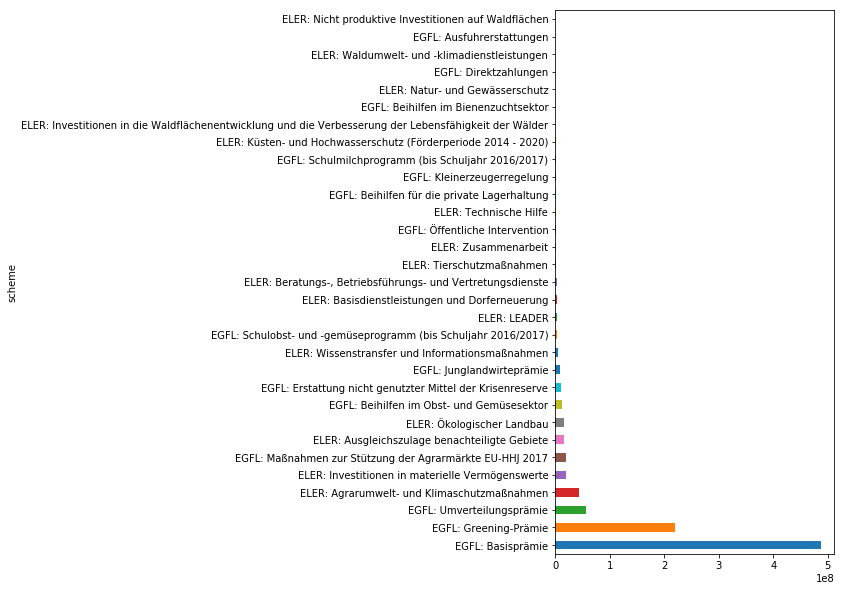

In [45]:
data2017.groupby('scheme')['amount'].agg('sum').sort_values(ascending=False).plot.barh(figsize=(5,10))

# Average subsidy per recipient

In [77]:
HTML('<h2>Average: {}</h2>'.format(locale.currency(data2017['amount'].sum()/len(data2017['recipient_name'].unique()))))

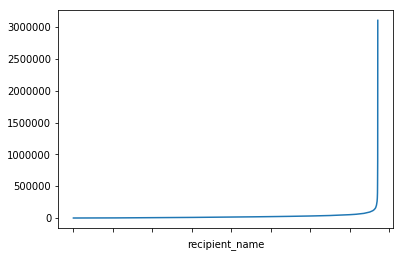

In [71]:
data2017.groupby('recipient_name')['amount'].agg('sum').sort_values().plot()

In [80]:
num_recipients = len(data2017['recipient_name'].unique())

In [87]:
top_receivers[:int(0.1*num_recipients)].sum()/data2017['amount'].sum()

0.3945264448826594

Text(0.5,0,'% of top receivers')

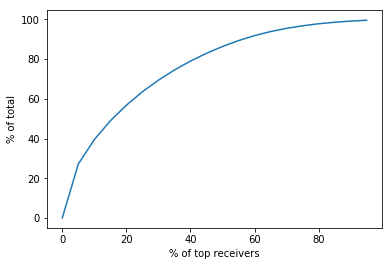

In [100]:
plt.plot(np.arange(0,1,0.05)*100, [100*top_receivers[:int(f*num_recipients)].sum()/data2017['amount'].sum() for f in np.arange(0,1,0.05)])
plt.ylabel('% of total')
plt.xlabel('% of top receivers')

TOTAL NUMBER OF RECEIVERS  38519


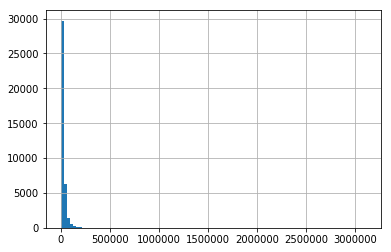

In [151]:
print('TOTAL NUMBER OF RECEIVERS ', top_receivers.count())
data2017.groupby('recipient_name')['amount'].agg('sum').hist(bins=100)

# Histogram of 30.000 lowest receivers (total 38519)

Total numbers of receivers: 

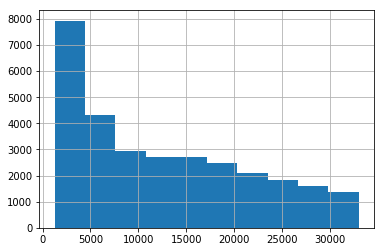

In [144]:
top_receivers[::-1][:30000].hist()


# Histogram of the top 25 receivers

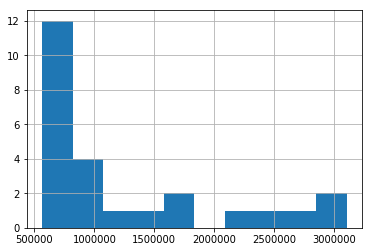

In [148]:
top_receivers[:25].hist()

In [152]:
data2017.to_csv('niedersachsen-subsidies-2017.csv')

In [ ]:
data2017